1. Сравните метрики hit_rate@k, precision@k.   
Какую метрику использовать предпочтительно и почему?  
Приведите пример 2-3 задач (опишите, что является клиентом, что товаром), в которой более уместно использовать метрику hit_rate?


**Отвте**: hit_rate@k в отличие от precision@k показывает, есть ли среди рекомендованных товаров купленные. И не различает количество покупок в множестве рекомендованных. Поэтому метрика precision@k более предпочтительна для оценки доли приобретённых товаров среди множества рекомендованных.

**Примеры задач в которых уместнее использовать иметрику hit_rate**:
1. Онлайн кинотеатр. После просмотра контента важно, чтобы пользователь на закрыл приложение, а посмотрел какой либо фипльм из предложенных. Здесь клиент-пользователь. Товар - фильм.
2. YouTube. Такой же принцип как и в 1-м примере. Клиент-пользователь. Товар - ролик.
3. Предложение однотипных дополнительных товаров. Например при покупке телефона - несколько защитных плёнок или стёкол, различающихся ценой. Понятно, что нужно оценивать покупку одной плёнки/стекла т.к. это наиболее частый сценарий. Здесь клиент - пользователь, товар - дополнительный однотипный товар (защитная плёнка/стекло).

2. В метрике NDCG@k мы используем логарифм в знаменателе. Как Вы думаете, почему именно логарифм? Какую функцию можно использовать вместо логарифма? Привидите пример метрик/подходов к предобработке данных/функций ошибок в ML, где также в  логарифм.



**Ответ**: Логарифм в метрике NDCG необходим, чтобы меньше штрафовать за неправильные предсказания, потому что он медленно растёт.

Использование логарифма как функции дисконтирования можно объяснить следующими интуитивными соображениями: с точки зрения ранжирования позиции в начале списка отличаются гораздо сильнее, чем позиции в его конце. Так, в случае поискового движка между позициями 1 и 11 целая пропасть (лишь в нескольких случаях из ста пользователь заходит дальшей первой страницы поисковой выдачи), а между позициями 101 и 111 особой разницы нет — до них мало кто доходит. Эти субъективные соображения прекрасно выражаются с помощью логарифма.

3. Какие еще метрики (Вы можете вспомнить уже пройденные Вами или посмотреть в интернете) могут использоваться для рекомендательных систем (приведите примеры метрики **и чем являются интеракции**, чтобы она могла быть использована).

**Ответ**:
- Cumulative gain at K (CG@K) - чем более релевантные элементы в этом топе, тем лучше. Однако метрика не нормализована и не учитывает позицию релевантных элементов.
- Expected reciprocal rank (ERR) - метрика качества ранжирования, основанной на каскадной модели поведения.
- PFound - метрика также использующая каскадную модель.

4. boughted = [1, 3, 5, 7, 9, 11]  
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]  
Посчитайте на этих данных pr@8, rec@8, AP@8, NDCG@8, RR@8, ERR@8 (expected reciprocal rank)  
Сначала поссчитайет "руками", а затем подтвердите рассчеты с помощью функций (некоторые были на семинаре, некоторые нужно будут написать самостоятельно)

**Пример выполнения 4го задания**

MSE на  
$y = [0, 2]$  
$y_{pred} = [1, 2]$

MSE = $0.5*((0 - 1)^2 + (2-2)^2) = 0.5$ 

In [1]:
import numpy as np
((np.array([0, 2]) - np.array([1, 2]))**2).mean()

0.5

In [2]:
import pandas as pd
import numpy as np

In [3]:
def hit_rate(recommended_list, bought_list):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    flags = np.isin(bought_list, recommended_list)
    hit_rate = (flags.sum() > 0).astype(int)
    return hit_rate


def hit_rate_at_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    flags = np.isin(bought_list, recommended_list)
    hit_rate = (flags.sum() > 0).astype(int)
    return hit_rate


def precision(recommended_list, bought_list):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    flags = np.isin(bought_list, recommended_list)
    precision = flags.sum() / len(recommended_list)
    return precision


def precision_at_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)   # Тут нет [:k] !!
    recommended_list = np.array(recommended_list)[:k]
    flags = np.isin(bought_list, recommended_list)
    precision = flags.sum() / len(recommended_list)
    return precision


def money_precision_at_k(recommended_list, bought_list, prices_recommended_list, k=5): 
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    prices_recommended_list = np.array(prices_recommended_list)[:k]
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]
    flags = np.isin(bought_list, recommended_list)
    print(flags*prices_recommended_list)
    precision = np.sum(flags*prices_recommended_list) / np.sum(prices_recommended_list)
    return precision


def recall(recommended_list, bought_list):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    flags = np.isin(bought_list, recommended_list)
    recall = flags.sum() / len(bought_list)
    return recall


def recall_at_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    flags = np.isin(bought_list, recommended_list)
    recall = flags.sum() / len(bought_list)
    return recall


def ap_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    flags = np.isin(recommended_list, bought_list)
    if sum(flags) == 0:
        return 0
    sum_ = 0
    for i in range(1, k+1): 
        if flags[i] == True:
            p_k = precision_at_k(recommended_list, bought_list, k=i)
            sum_ += p_k
    return sum_ / len(flags)


def reciprocal_rank(recommended_list, bought_list):
    ranks=0.
    
    for i, item in enumerate(recommended_list):
        if item in bought_list:
            return 1 / (i+1)
    return 0


def mean_reciprocal_rank(recommended_list, bought_list):
    ranks=0.
    for item_rec in recommended_list:
        for i, item_bought in enumerate(bought_list):
            if item_rec == item_bought:
                ranks += 1 / (i+1)
    return ranks / len(recommended_list)

In [4]:
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]
bought = [1, 3, 5, 7, 9, 11]

k - ограничивает список рекомендованных товаров

$precison@8 = \frac{совпадения}{кол.рекомендаций} = \frac{0 + 0 + 1 + 1 + 1 + 1}{1+1+1+1+1+1+1+1} = 4/8 = 50\%$  

In [5]:
precision_at_k(recommended, bought, k=8)

0.5

$recall@8 = \frac{совпадения}{кол.покупок} = \frac{0 + 0 + 1 + 1 + 1 + 1}{1+1+1+1+1+1} = 4/6 = 66.6\%$  

In [6]:
recall_at_k(recommended, bought, k=8)

0.6666666666666666

**AP@k - average precision at k**
- K - кол-во рекомендованных
- Суммируем по всем релевантным товарам
- Зависит от порядка рекомендаций

$$AP@k = \frac{1}{N(k)} \sum_{n=1}^{k} \frac{TPseen(i)}{i} $$

In which TP stands for True Positives, whereas N(k) and TP seen can be calculated from the following formulas.

$N(k) = min(k,TP_{total})$

TPseen(i) = 0; if i-th is False 

TPseen(i) = TP seen till i; if i-th is True 

[Статья про mAP@k](https://medium.com/@misty.mok/how-mean-average-precision-at-k-map-k-can-be-more-useful-than-other-evaluation-metrics-6881e0ee21a9)

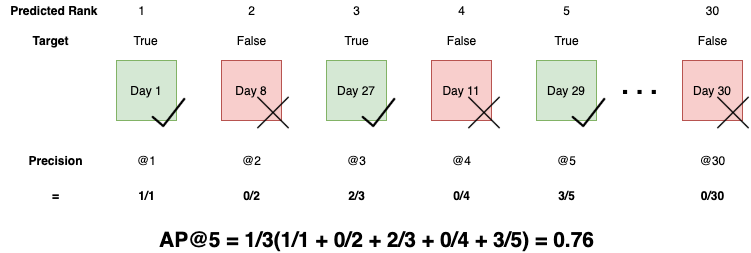

In [7]:
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]
bought = [1, 3, 5, 7, 9, 11]

Расчёт "по методичке"

In [8]:
1/6*(0/1 + 0/2 + 1/3 + 1/4 + 1/5 + 1/6)

0.1583333333333333

$AP@8 =\frac{1}{K}\sum{[recommended_{relevant_i}]*precision@k} = \frac{1}{6} \sum{(0/1 + 0/2 + 1/3 + 1/4 + 1/5 + 1/6)} = 15.8\%$ 

In [9]:
ap_k(recommended, bought, k=8)

0.16

Альтернативный расчёт

$AP@8 =\frac{1}{K}\sum{[recommended_{relevant_i}]*precision@k} = \frac{1}{6} \sum{(0/1 + 0/2 + 1/3 + 2/4 + 3/5 + 4/6)} = 35\%$ 

In [10]:
1/6*(0/1 + 0/2 + 1/3 + 2/4 + 3/5 + 4/6)

0.3499999999999999

**Расчёт 𝑁𝐷𝐶𝐺@8**

Normalized discounted cumulative gain

$$DCG = \frac{1}{|r|} \sum_u{\frac{[bought fact]}{discount(i)}}$$  

$discount(i) = 1$ if $i <= 2$,   
$discount(i) = log_2(i)$ if $i > 2$


(!) Считаем для первых k рекоммендаций   
(!) - существуют вариации с другими $discount(i)$  
i - ранк рекомендованного товара  
|r| - кол-во рекомендованных товаров 

$$NDCG = \frac{DCG}{ideal DCG}$$

In [11]:
1/8 * ( 0 + 1/np.log2(2) + 1/np.log2(3) + 0 + 1/np.log2(5) + 1/np.log2(6) + 0 + 0 )

0.30605738985992403

In [12]:
1/8 * (1/1 + 1/np.log2(2) + 1/np.log2(3) + 1/np.log2(4) + 1/np.log2(5) + 1/np.log2(6) + 1/np.log2(7) + 1/np.log2(8))

0.5797499549150934

In [13]:
0.3061 / 0.5797

0.5280317405554596

Посчитаем DCG:

$ DCG@8 = 1/8 * (0/log(1) + 1/log(2) + 1/log(3) + 0/log(4) + 1/log(5) + 1/log(6) + 0/log(7) + 0/log(8)) = 30.6\% $

Посчитаем idealDCG:

$ idealDCG@8 = 1/8 * (1/1 + 1/log(2) + 1/log(3) + 1/log(4) + 1/log(5) + 1/log(6) + 1/log(7) + 1/log(8)) = 57.8\% $

Теперь NDCG

$ NDCG@8 =  \frac{DCG}{ideal DCG} = 0.3061 / 0.5797 = 52.8\% $

**Расчёт Reciprocal Rank: RR@8**

RR_j - reciproсal rank для j-го объекта — величина, равная обратному ранку первого правильно угаданного элемента.

In [14]:
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]
bought = [1, 3, 5, 7, 9, 11]

Первый угаданный элемент "5". Он находиться на 2-й позиции списка recommended. Следовательно:

RR_2 элемента "5" = 1/2 = 0.5

In [15]:
reciprocal_rank(recommended, bought)

0.5

**Расчёт Mean Reciprocal Rank (среднеобратный ранг):**

$$MRR = mean(\frac{1}{k_u})$$

In [16]:
1/10 * (1/3 + 1/4 + 1/6 + 1/5 + 1/2)

0.145

In [17]:
mean_reciprocal_rank(recommended, bought)

0.145